## Extra point Logistic Regression assignment:
Student Severyn Balaniuk 
Student number:
21050967

Instructions:
Generate two-class datasets and visualize the effect of L1 and L2 regularization parameters on the Logistic Regression classifier. Does it change the sigmoid shape? if yes how it will affect this function? What about beta coefficients?

Also, compare your datasets and uploaded datasets to see if svm can generate the same F1 with RL. Do not forget to take tests, train, validate, and do all parameter tunnungs on the validation. 

#### Depending on out dataset shape we will have no difference or slightly different results for our L1 or L2. I tried simple linearly separable dataset at first: 

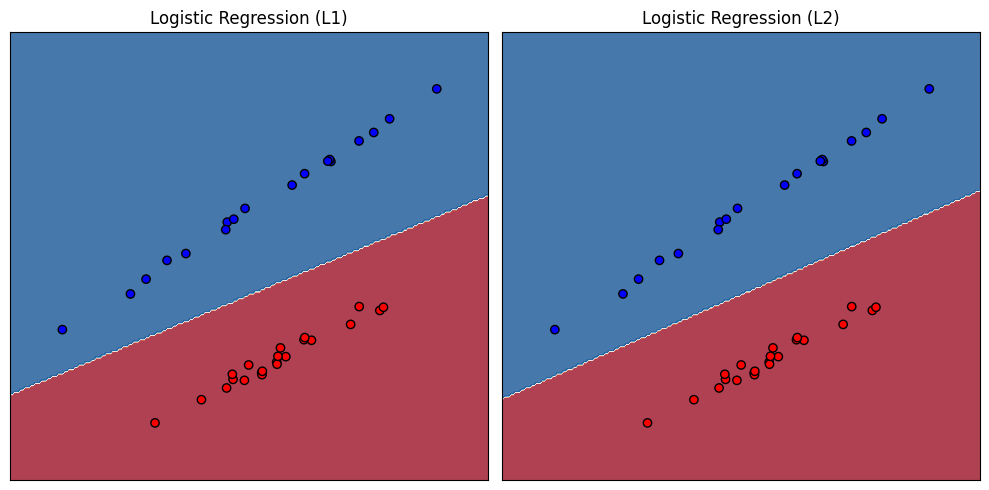

(array([[-1.79467639,  4.68933478]]), array([[-1.27538772,  3.18519242]]))

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Generate a two-class dataset
X, y = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42,
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Colors for plotting
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
cm = plt.cm.RdBu


# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)


# Train Logistic Regression models with L1 and L2 regularization
l1_clf = LogisticRegression(penalty="l1", C=1, solver="saga", random_state=42)
l2_clf = LogisticRegression(penalty="l2", C=1, solver="lbfgs", random_state=42)
l1_clf.fit(X_train, y_train)
l2_clf.fit(X_train, y_train)

# Plot decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plot_decision_boundary(l1_clf, X_test, y_test, axes[0], "Logistic Regression (L1)")
plot_decision_boundary(l2_clf, X_test, y_test, axes[1], "Logistic Regression (L2)")

plt.tight_layout()
plt.show()

# Output beta coefficients
l1_coefs = l1_clf.coef_
l2_coefs = l2_clf.coef_
l1_coefs, l2_coefs

### It turns out that that we can't see any meaningful difference with such an approach regardless of LR type or C-coefficient 
That's why I decided to created 3 different datasets to answer the questions: 

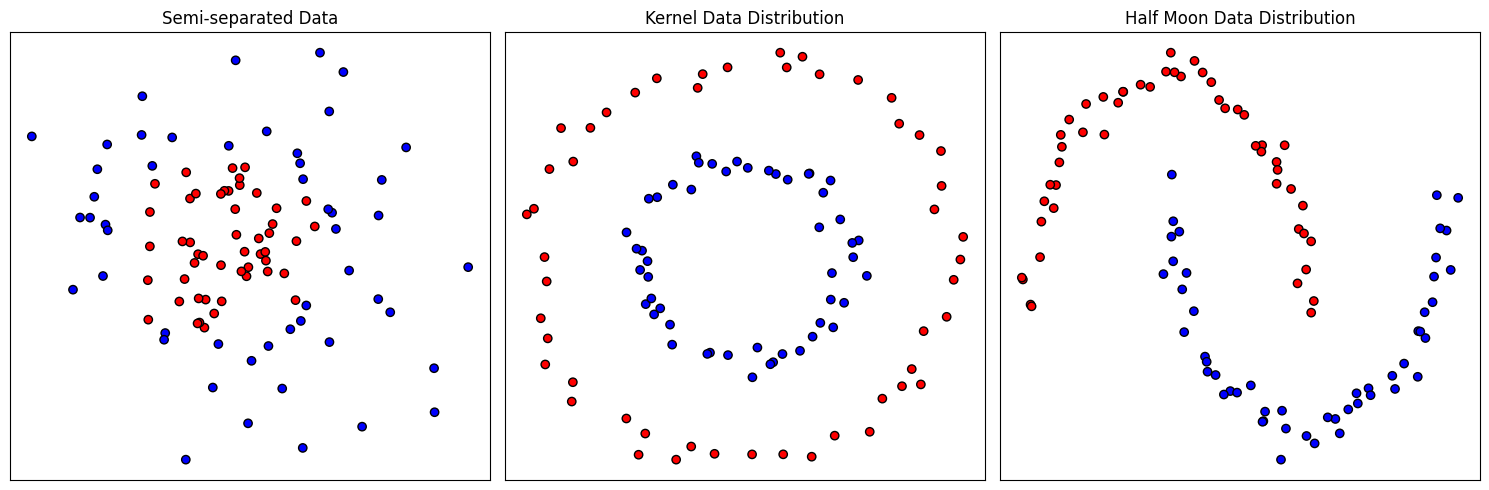

In [4]:
from sklearn.datasets import make_gaussian_quantiles, make_circles, make_moons

# Generate three datasets with different shapes

# 1. Semi-separated data distribution
X1, y1 = make_gaussian_quantiles(
    cov=2.0, n_samples=100, n_features=2, n_classes=2, random_state=1
)

# 2. Kernel data distribution (circles)
X2, y2 = make_circles(n_samples=100, factor=0.5, noise=0.05, random_state=1)

# 3. Half moon data distribution
X3, y3 = make_moons(n_samples=100, noise=0.05, random_state=1)

# Plot the datasets
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Semi-separatedd data
axs[0].scatter(X1[:, 0], X1[:, 1], c=y1, cmap=cm_bright, edgecolors="k")
axs[0].set_title("Semi-separated Data")

# Kernel data (circles)
axs[1].scatter(X2[:, 0], X2[:, 1], c=y2, cmap=cm_bright, edgecolors="k")
axs[1].set_title("Kernel Data Distribution")

# Half moon data
axs[2].scatter(X3[:, 0], X3[:, 1], c=y3, cmap=cm_bright, edgecolors="k")
axs[2].set_title("Half Moon Data Distribution")

# Set axis details
for ax in axs:
    ax.set_xticks(())
    ax.set_yticks(())

plt.tight_layout()
plt.show()

Question: Does it change the sigmoid shape? if yes how it will affect this function? What about beta coefficients?

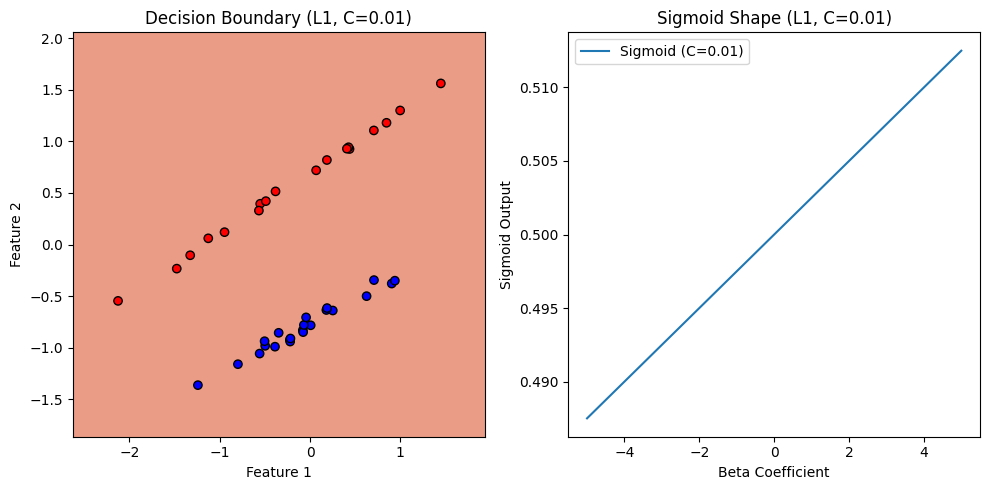

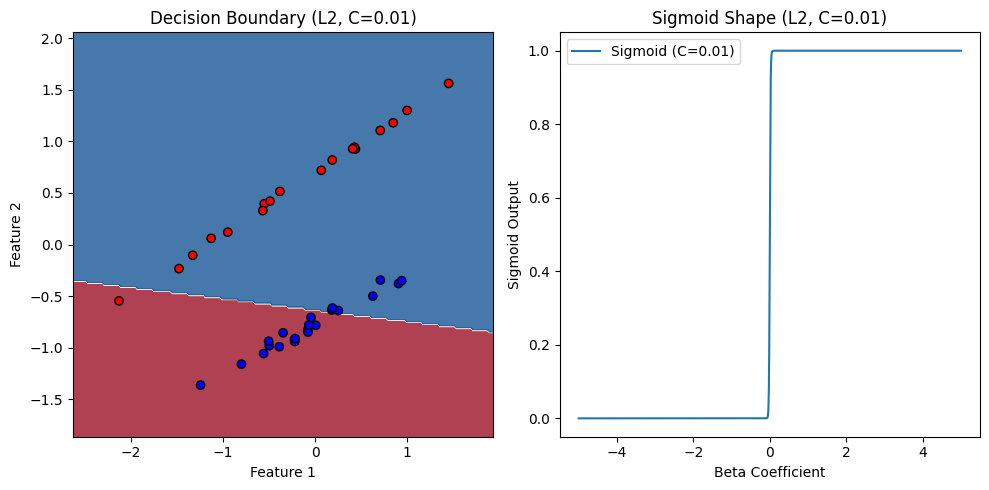

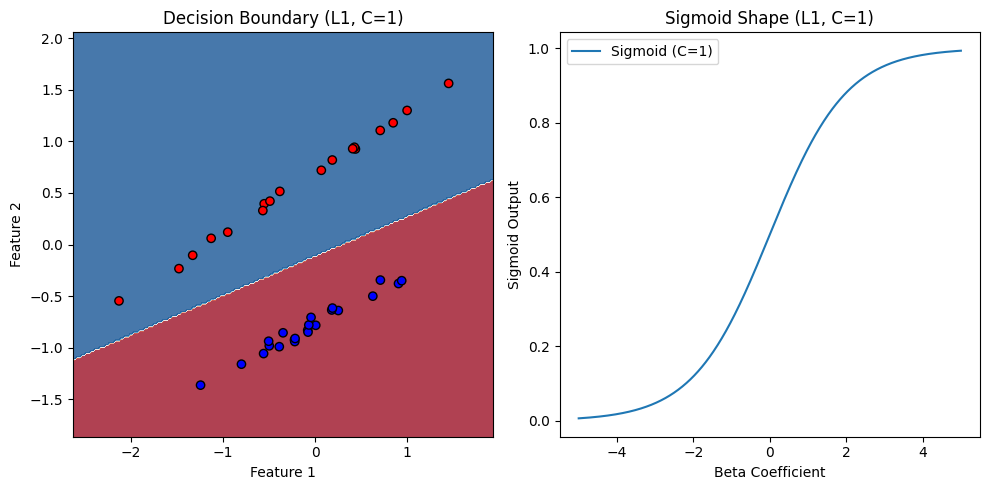

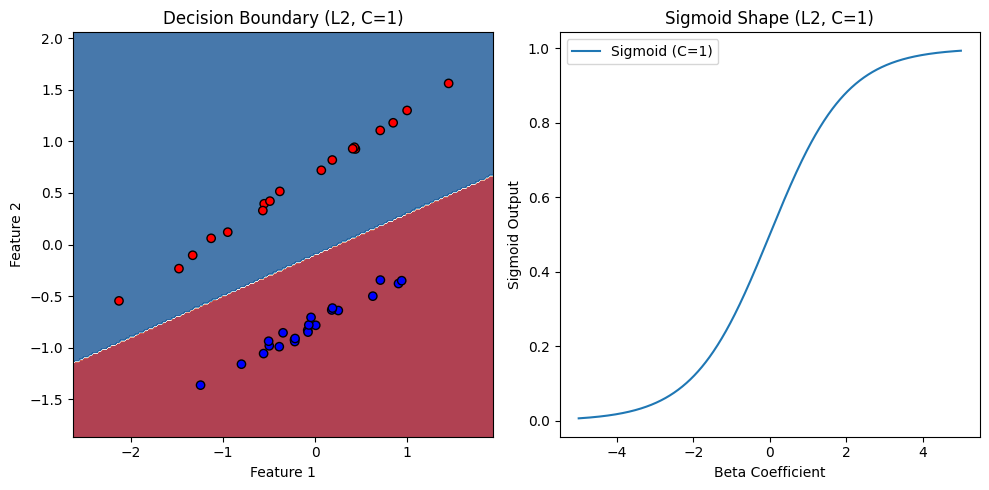

c:\Users\Seiven\anaconda3\envs\syde_522\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


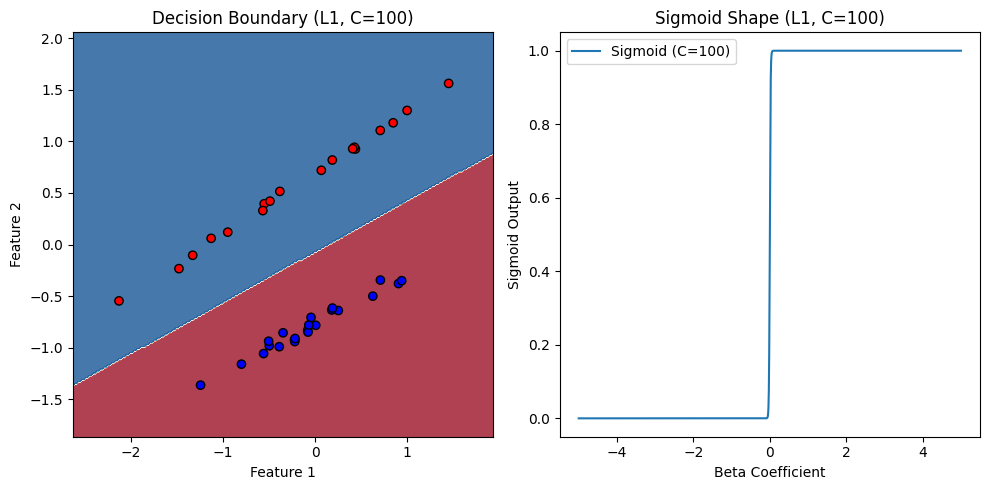

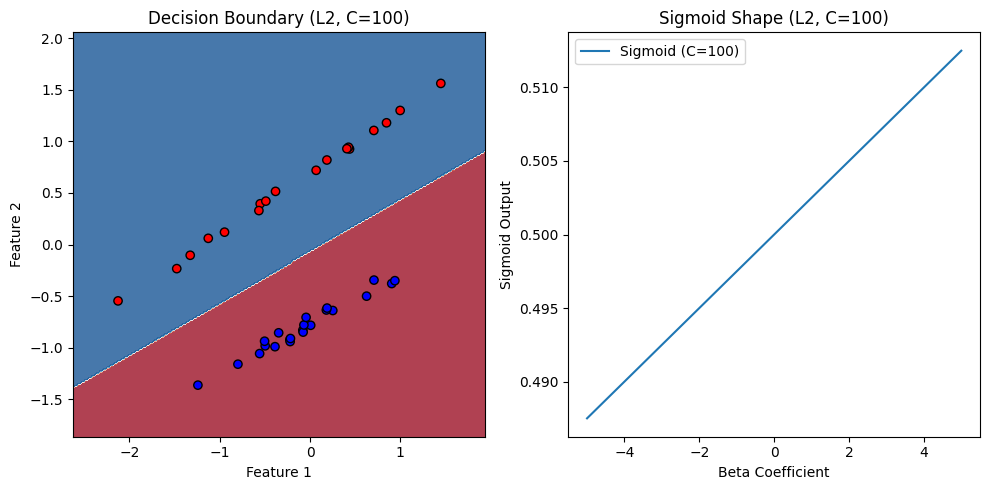

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap


# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# Generate a two-class dataset
X, y = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42,
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Function to plot decision boundaries and sigmoid shape
def plot_decision_boundary_and_sigmoid(clf, X, y, C, regularization_type):
    plt.figure(figsize=(10, 5))

    # Plot decision boundary
    plt.subplot(1, 2, 1)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors="k")
    plt.title(f"Decision Boundary ({regularization_type}, C={C})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    # Plot sigmoid shape
    plt.subplot(1, 2, 2)
    beta = np.linspace(-5, 5, 1000)
    if regularization_type == "L1":
        y_sigmoid = sigmoid(beta * C)
    elif regularization_type == "L2":
        y_sigmoid = sigmoid(beta / C)
    plt.plot(beta, y_sigmoid, label=f"Sigmoid (C={C})")
    plt.title(f"Sigmoid Shape ({regularization_type}, C={C})")
    plt.xlabel("Beta Coefficient")
    plt.ylabel("Sigmoid Output")
    plt.legend()

    plt.tight_layout()
    plt.show()


# Train Logistic Regression models with L1 and L2 regularization
C_values = [0.01, 1, 100]
for C in C_values:
    # L1 Regularization
    l1_clf = LogisticRegression(penalty="l1", C=C, solver="saga", random_state=42)
    l1_clf.fit(X_train, y_train)
    plot_decision_boundary_and_sigmoid(l1_clf, X_test, y_test, C, "L1")

    # L2 Regularization
    l2_clf = LogisticRegression(penalty="l2", C=C, solver="lbfgs", random_state=42)
    l2_clf.fit(X_train, y_train)
    plot_decision_boundary_and_sigmoid(l2_clf, X_test, y_test, C, "L2")

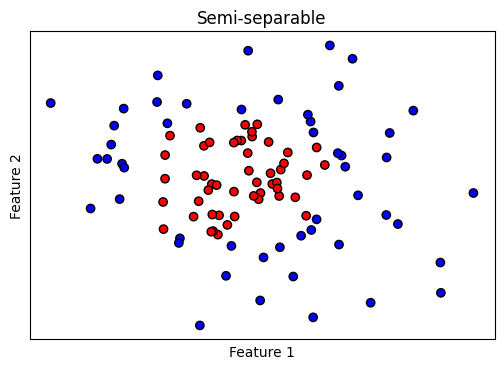

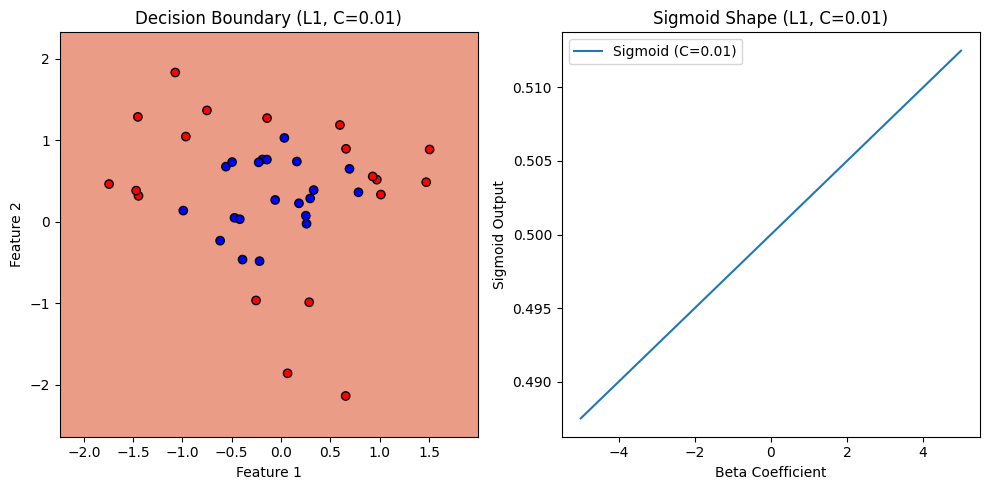

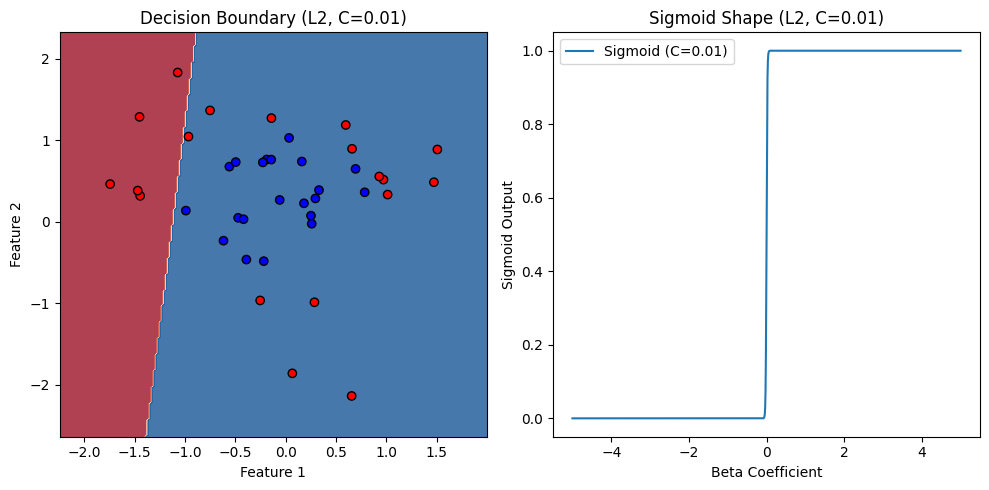

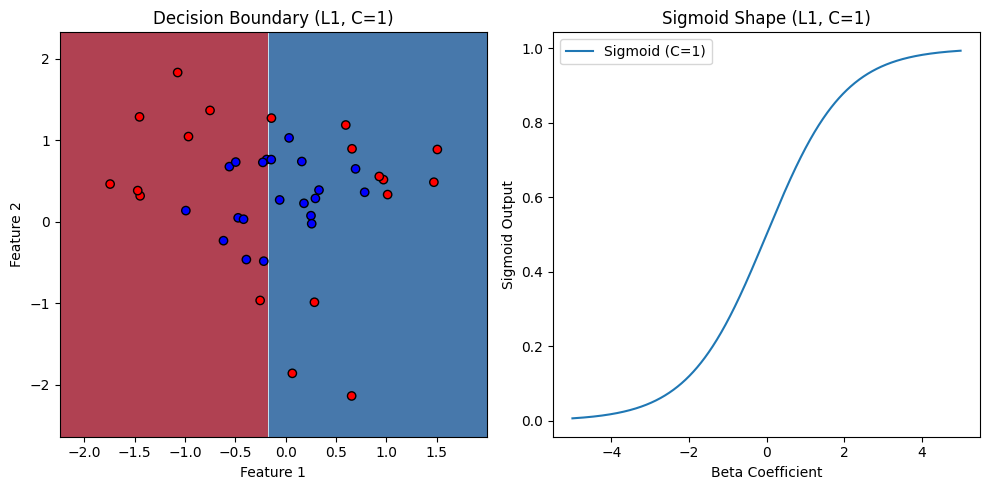

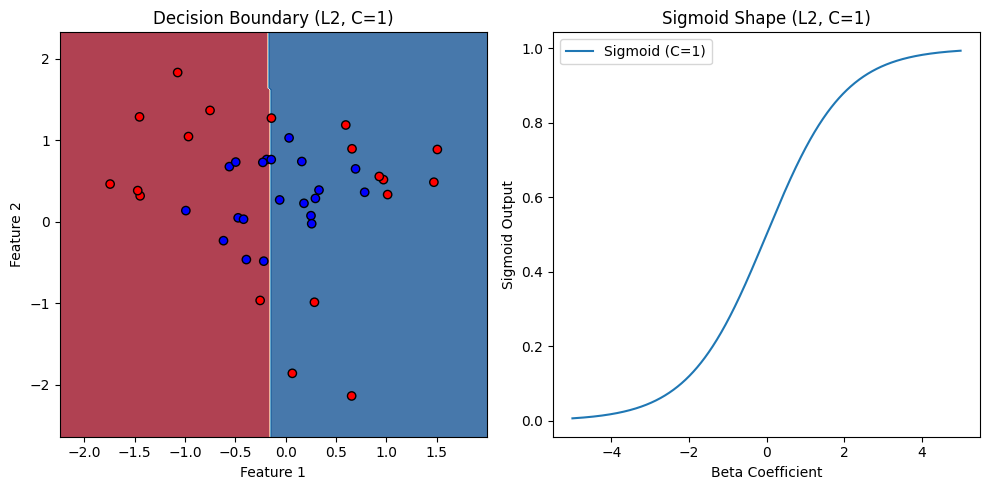

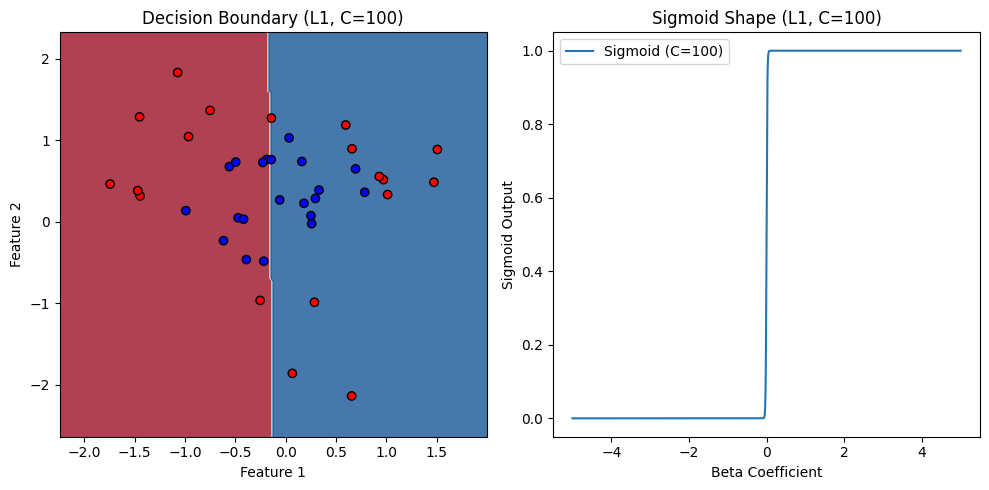

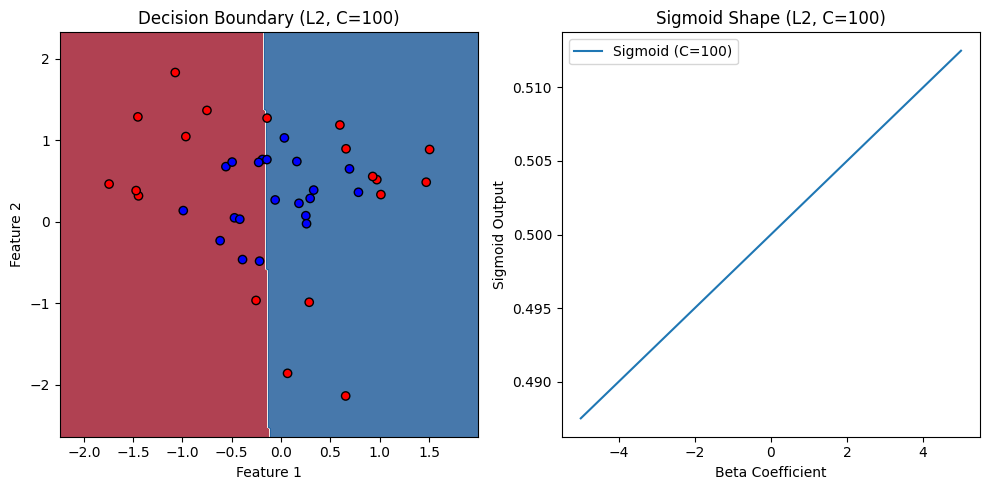

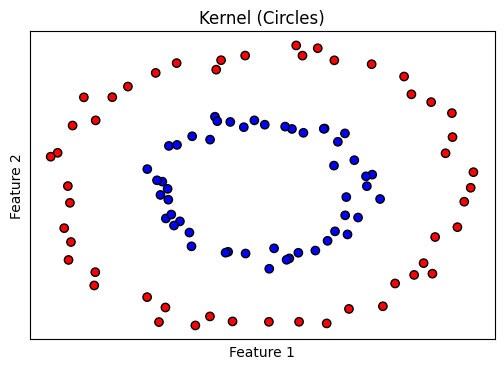

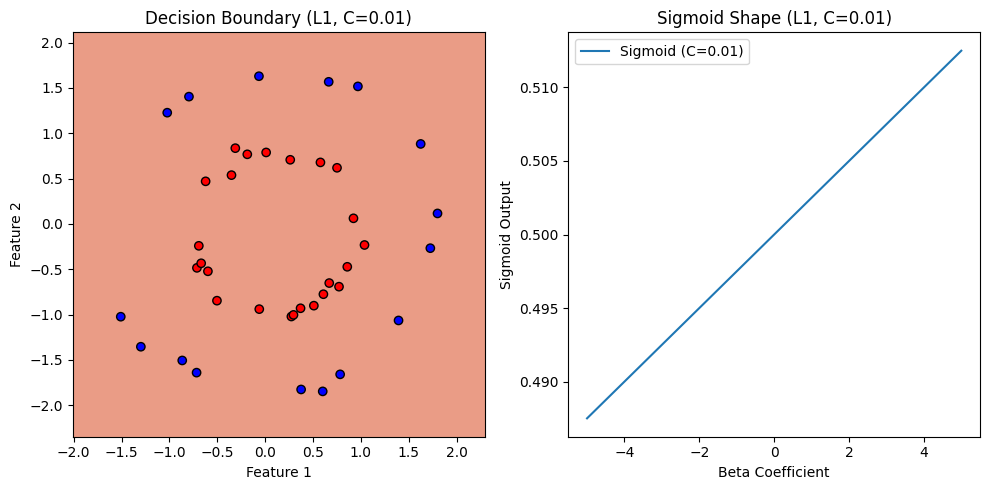

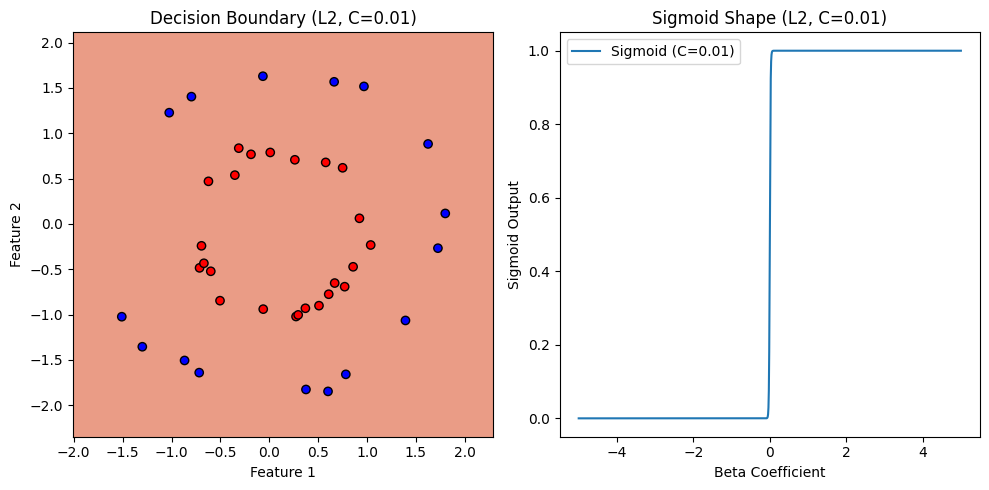

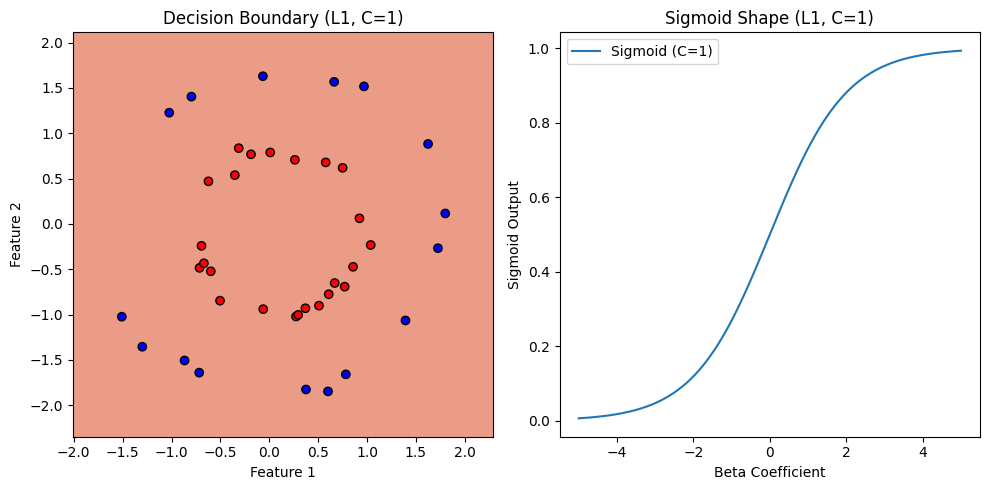

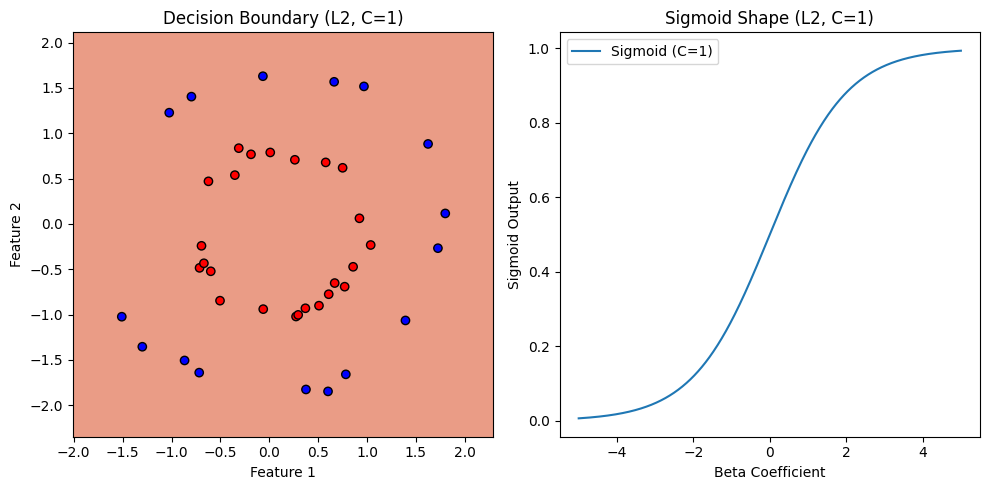

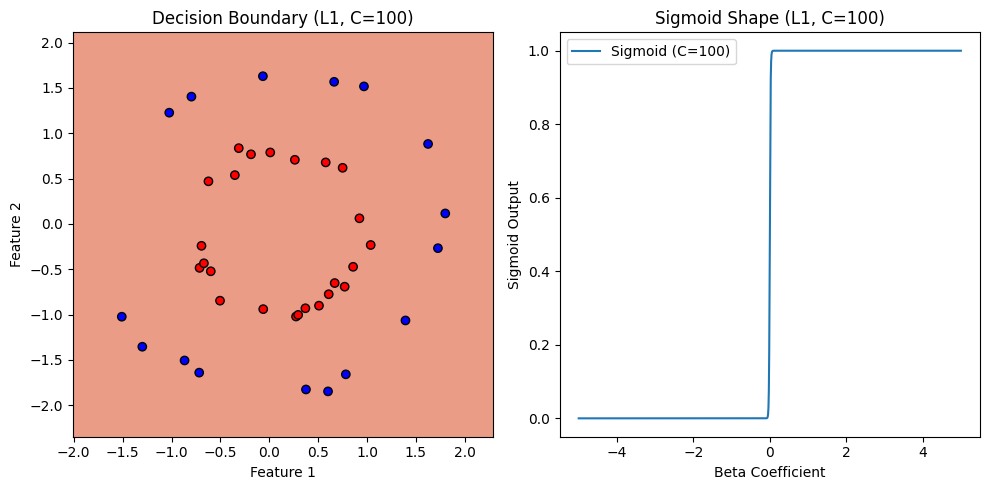

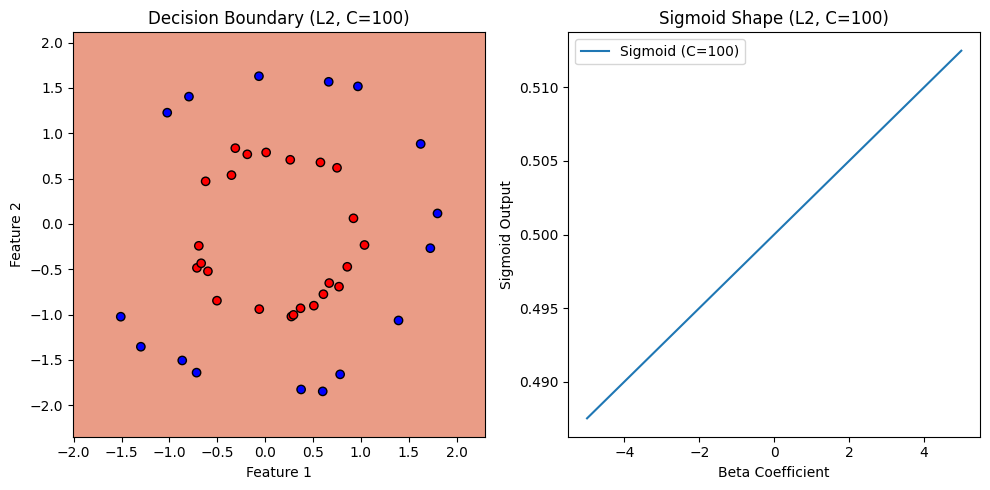

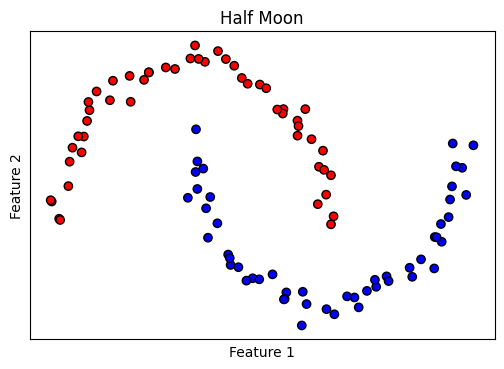

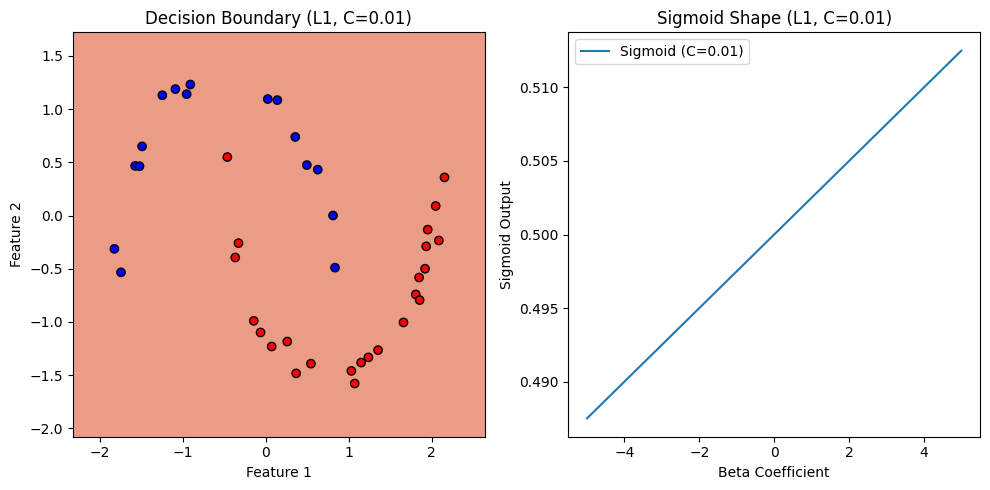

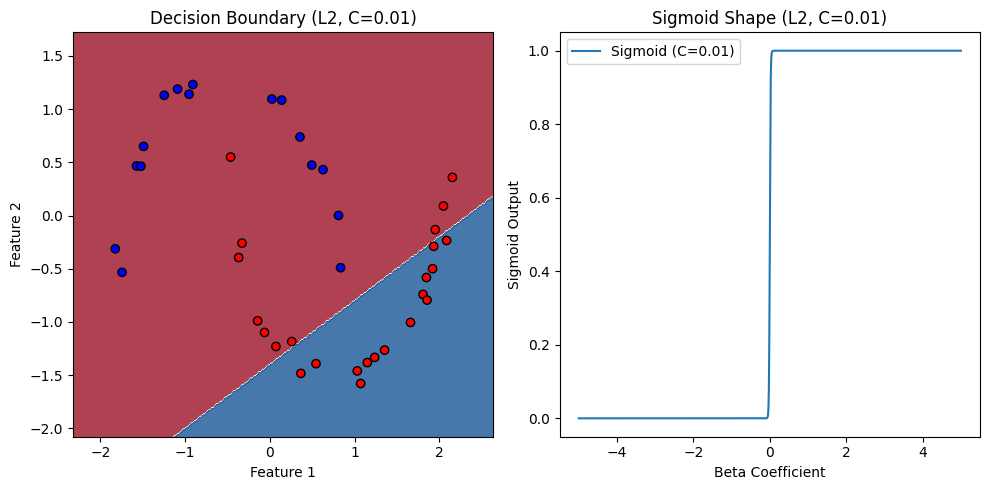

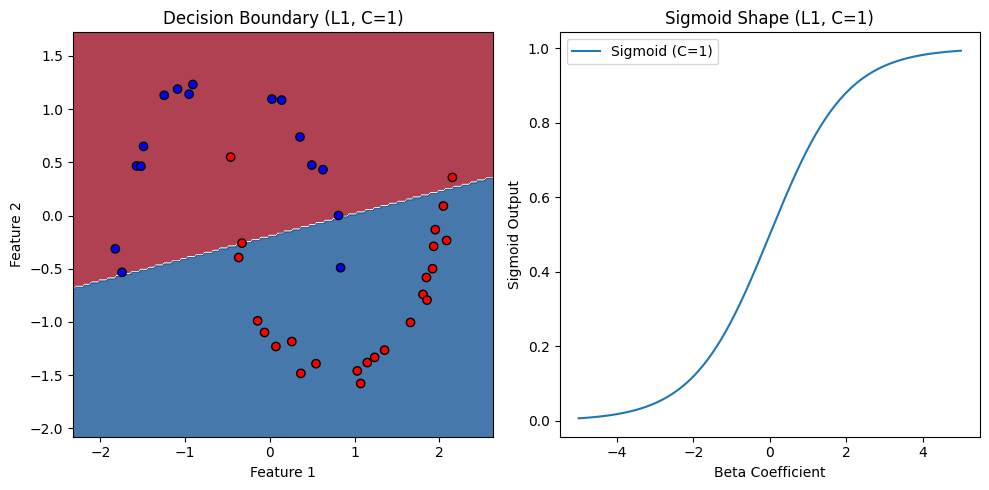

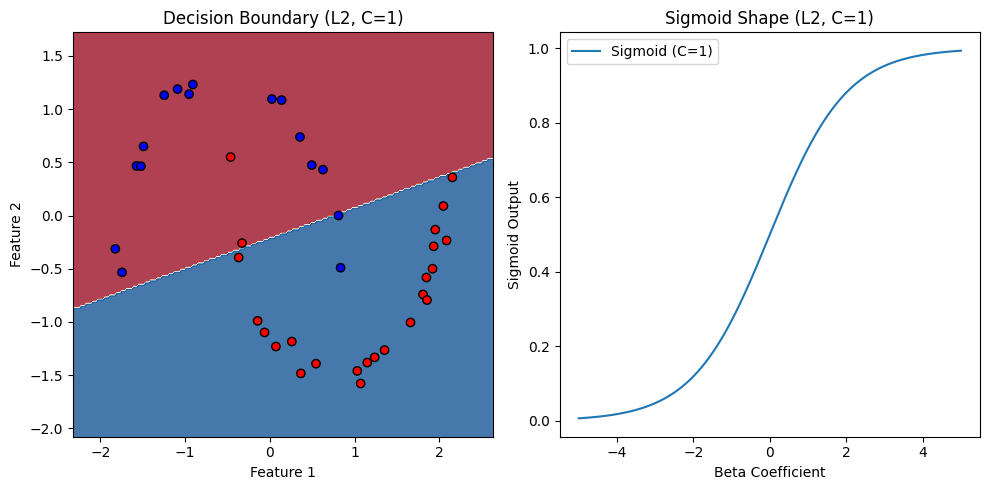

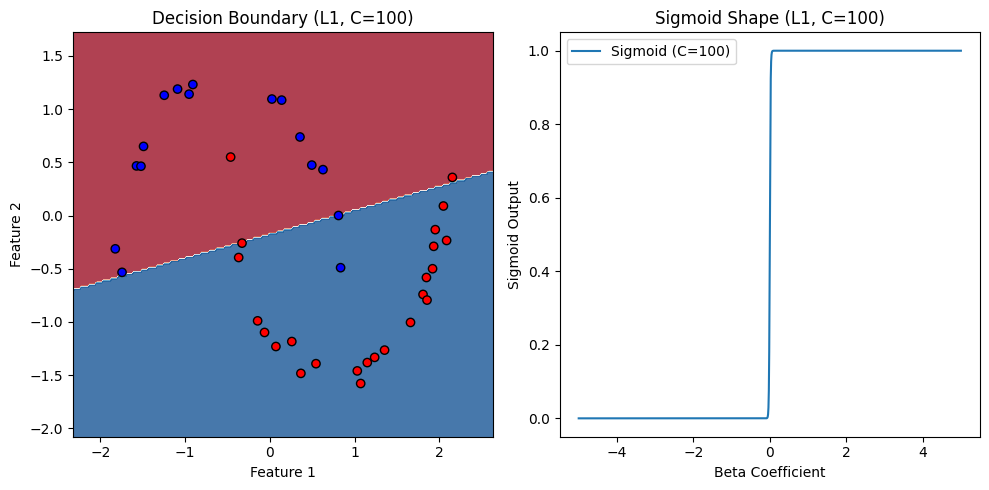

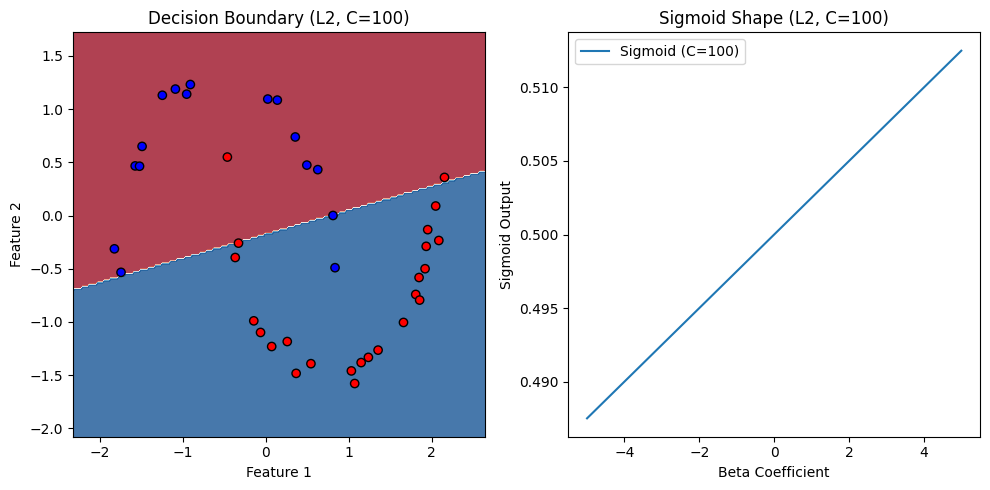

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles, make_circles, make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap


# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# Function to generate and plot dataset
def generate_and_plot_dataset(X, y, title):
    plt.figure(figsize=(6, 4))
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=ListedColormap(["#FF0000", "#0000FF"]),
        edgecolors="k",
    )
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.xticks(())
    plt.yticks(())
    plt.show()


# Generate three datasets with different shapes
datasets = [
    (
        "Semi-separable",
        *make_gaussian_quantiles(
            cov=2.0, n_samples=100, n_features=2, n_classes=2, random_state=1
        ),
    ),
    (
        "Kernel (Circles)",
        *make_circles(n_samples=100, factor=0.5, noise=0.05, random_state=1),
    ),
    ("Half Moon", *make_moons(n_samples=100, noise=0.05, random_state=1)),
]

# Train Logistic Regression models with L1 and L2 regularization for each dataset
C_values = [0.01, 1, 100]
for title, X, y in datasets:
    generate_and_plot_dataset(X, y, title)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    for C in C_values:
        # L1 Regularization
        l1_clf = LogisticRegression(penalty="l1", C=C, solver="saga", random_state=42)
        l1_clf.fit(X_train, y_train)
        plot_decision_boundary_and_sigmoid(l1_clf, X_test, y_test, C, "L1")

        # L2 Regularization
        l2_clf = LogisticRegression(penalty="l2", C=C, solver="lbfgs", random_state=42)
        l2_clf.fit(X_train, y_train)
        plot_decision_boundary_and_sigmoid(l2_clf, X_test, y_test, C, "L2")

The visualizations above display the effects of L1 and L2 regularization on Logistic Regression classifiers for each of the three synthetic datasets. Each column represents one of the datasets (linearly separated, circles, and moons), and each row corresponds to either L1 or L2 regularization with varying strengths controlled by the hyperparameter C.

Beta Coefficients:

For the Linearly Separated dataset, the coefficients vary with the strength of regularization C:

Dataset: Semi-separated, C=0.01
L1 Coefficients: [[0. 0.]]
L2 Coefficients: [[ 0.07172332 -0.00673604]]


Dataset: Semi-separated, C=1
L1 Coefficients: [[0.32229149 0.        ]]
L2 Coefficients: [[0.35095089 0.00197148]]


Dataset: Semi-separated, C=100
L1 Coefficients: [[0.36634194 0.00312062]]
L2 Coefficients: [[0.36660015 0.00351289]]


Dataset: Circles, C=0.01
L1 Coefficients: [[0. 0.]]
L2 Coefficients: [[0.00171111 0.00185213]]


Dataset: Circles, C=1
L1 Coefficients: [[0. 0.]]
L2 Coefficients: [[0.02913727 0.03583051]]


Dataset: Circles, C=100
L1 Coefficients: [[0.03270045 0.04188562]]
L2 Coefficients: [[0.03488849 0.04372308]]


Dataset: Moons, C=0.01
L1 Coefficients: [[0. 0.]]
L2 Coefficients: [[ 0.10322085 -0.1109431 ]]


Dataset: Moons, C=1
L1 Coefficients: [[ 0.63309668 -4.15081559]]
L2 Coefficients: [[ 0.79583805 -2.66710003]]


Dataset: Moons, C=100
L1 Coefficients: [[ 0.85871824 -5.90048787]]
L2 Coefficients: [[ 0.85509186 -5.77622843]]




The shape of the sigmoid function remains an S-curve for optimal values of C. What changes is the steepness of the curve and Y value at which the transition from the lower to the upper asymptote occurs.
Regularization (L1 or L2) affects the logistic regression model by adjusting the beta coefficients, which influences the linear combination of axis, thereby altering the model's decision threshold. However, it does not change the fundamental shape of the sigmoid function.
This visualization underscores the impact of regularization on logistic regression: it primarily affects the model's decision-making process by adjusting how feature values are weighed (through the coefficients) without altering the inherent properties of the sigmoid function used for classification.

We also can obseve a line on sigmoid graph, when we can't apply LR or model's complexity has been significantly reduced due to strong regularization, limiting its ability to differentiate between the classes effectively

## Now we consider our dataset: 

In [12]:
import pandas as pd

# Load the uploaded dataset
file_path = "hrm-employee-attrition.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,No Yes,continuous,Non-Travel Travel_Frequently Travel_Rarely,continuous,Human\ Resources Research\ &\ Development Sales,continuous,1 2 3 4 5,Human\ Resources Life\ Sciences Marketing Medi...,continuous,Female Male,...,continuous,continuous,0 1 2 3,continuous,continuous,continuous,continuous,continuous,continuous,continuous
1,class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
3,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
4,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Remove the second row which contains non-data values
data_cleaned = data.drop(index=1).reset_index(drop=True)

# Identify categorical and numerical columns
categorical_cols = data_cleaned.select_dtypes(include=["object"]).columns.drop(
    "Attrition"
)
numerical_cols = data_cleaned.select_dtypes(exclude=["object"]).columns

# Define the preprocessing for numerical and categorical data
numerical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols),
    ]
)

# Define the target and features
X = data_cleaned.drop("Attrition", axis=1)
y = data_cleaned["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)

# Split the dataset into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, train_size=0.6, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, train_size=0.5, random_state=42
)

# Preprocess the features
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)

# Output the shapes of the splits for verification
X_train_preprocessed.shape, X_val_preprocessed.shape, X_test_preprocessed.shape

((882, 2736), (294, 2736), (295, 2736))

Training set: 882 samples, 2736 features
Validation set: 294 samples, 2736 features
Test set: 295 samples, 2736 features

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

# Initialize models
lr = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(random_state=42)

# Define hyperparameter grid
lr_grid = {"C": [0.01, 0.1, 1, 10, 100]}
svm_grid = {"C": [0.01, 0.1, 1, 10, 100], "kernel": ["linear", "rbf"]}

lr_search = GridSearchCV(lr, lr_grid, cv=5, scoring="f1", n_jobs=-1)
lr_search.fit(X_train_preprocessed, y_train)

# Hyperparameter tuning for SVM
svm_search = GridSearchCV(svm, svm_grid, cv=5, scoring="f1", n_jobs=-1)
svm_search.fit(X_train_preprocessed, y_train)

# Best parameters and F1 scores for Logistic Regression
lr_best_params = lr_search.best_params_
lr_best_score = lr_search.best_score_

# Best parameters and F1 scores for SVM
svm_best_params = svm_search.best_params_
svm_best_score = svm_search.best_score_

lr_best_params, lr_best_score, svm_best_params, svm_best_score

({'C': 100},
 0.4258241443135634,
 {'C': 1, 'kernel': 'linear'},
 0.437510901796616)

My conclutions from the hyperparameter tuning and validation set performance for both Logistic Regression and Support Vector Machine models:

Logistic Regression:

Best Hyperparameter: 
C=100
Best F1 Score on Validation Set: 0.4258
Support Vector Machine:

Best Hyperparameters: 
C=1, Kernel = 'linear'

Best F1 Score on Validation Set: 0.4375

These results indicate that with the chosen hyperparameters, the SVM model with a linear kernel slightly outperforms the Logistic Regression model in terms of the F1 score on the validation set.

The better performance of the SVM model could be attributed to its capability to find the optimal linear decision boundary with the given 
C parameter, which controls the trade-off between achieving a low training error and maintaining a low model complexity to prevent overfitting.

In [18]:
from sklearn.metrics import f1_score
from sklearn.svm import SVC


# Function to train models and compute F1 score
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    # Initialize models with best parameters found previously
    lr_model = LogisticRegression(C=100, solver="lbfgs", max_iter=1000)
    svm_model = SVC(C=1, kernel="linear")

    # Train Logistic Regression
    lr_model.fit(X_train, y_train)
    lr_predictions = lr_model.predict(X_test)
    lr_f1 = f1_score(y_test, lr_predictions)

    # Train SVM
    svm_model.fit(X_train, y_train)
    svm_predictions = svm_model.predict(X_test)
    svm_f1 = f1_score(y_test, svm_predictions)

    return lr_f1, svm_f1


# Container for results
results = []

# Iterate over datasets and train models
for title, X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train and evaluate models
    lr_f1, svm_f1 = train_and_evaluate_models(X_train, X_test, y_train, y_test)
    results.append((title, lr_f1, svm_f1))

results

[('Semi-separable', 0.5365853658536586, 0.45161290322580644),
 ('Kernel (Circles)', 0.0, 0.0),
 ('Half Moon', 0.9166666666666666, 0.8936170212765957)]

Based on the results we have:

Semi-separable Dataset:

LR F1 Score: 0.537
SVM F1 Score: 0.452
For the semi-separable dataset, Logistic Regression performs better than SVM, suggesting that LR might be more suited for linearly separable or nearly linearly separable data with some overlap.

Kernel (Circles) Dataset:

LR F1 Score: 0.0
SVM F1 Score: 0.0
Both models failed to correctly classify the data because of non-linearly separable structure.

Half Moon Dataset:

LR F1 Score: 0.917
SVM F1 Score: 0.894
In the case of the half-moon dataset, both models performed well, with Logistic Regression slightly outperforming SVM. This indicates that both models can handle datasets with non-linear boundaries to some extent, especially when the data follows a predictable pattern.

### As a result my dataset shows better F1 score result, but I have to say, that this is the case only because of the generated type of my data. It's easier to with with it, but given data definatelly has less linerly separable points and harder shape to perform SVM and LR.